$$TALLER.$$ 
$$27/08/2021$$

$$Johan Sebastian Palacios, Andres Castaño Velasquez, Bryan Valencia$$

In [ ]:
from sympy.solvers import solve_linear_system #Para resolver el sistema lineal
from sympy import Symbol #Para definir los simbolos
import sympy as sym 
from scipy.signal import lti 
from scipy.fftpack import fft, fftfreq, fftshift #Transformada, frecuencias y centrado
import matplotlib.pyplot as plt #Para graficar
from scipy import signal
from scipy.integrate import cumtrapz #Para integrar con el metodo de trapecios acumulando
import numpy as np
import matplotlib.pyplot as plt
from sympy.matrices import Matrix #Trabajo con matrices
import warnings
from sympy import Symbol
from scipy.fftpack import fft, fftshift, ifft
from scipy.fftpack import fftfreq
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

RUIDO BLANCO GAUSSIANO

(0.17985960361725933, 0.0012347388313724346, 0.03234947701335765)

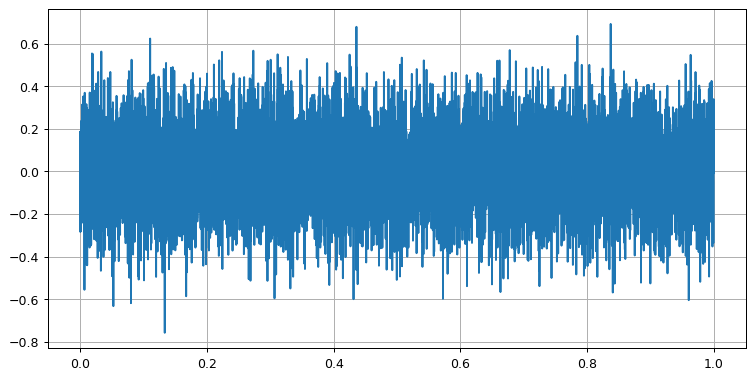

In [ ]:
t = np.linspace(0, 1, 10000)
Rui=0
i=0
while(i<30):
   ruidos = np.random.normal(0,1, 10000)
   Rui=Rui+ruidos
   
   i=i+1
prorui=Rui/i
ruido=prorui


plt.figure(figsize=(10,5), dpi=90)

plt.plot(t, ruido)
plt.grid(True)
std=np.std(ruido)
me=np.mean(ruido)
va=np.var(ruido)
std, me, va

Histograma ruido 

Text(0, 0.5, 'Amplitude')

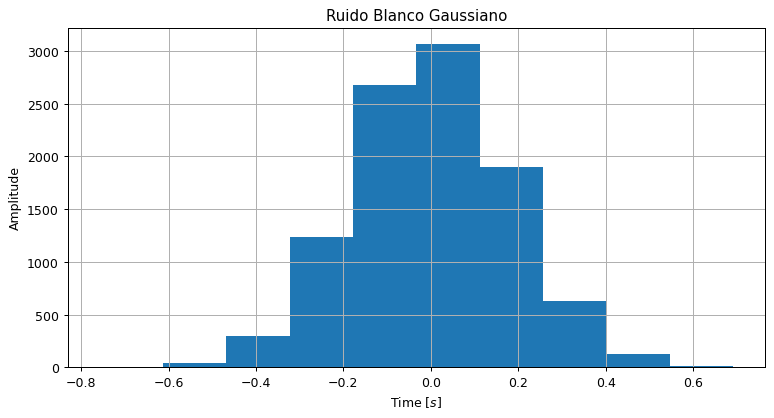

In [ ]:
import seaborn as sns, numpy as np
plt.figure(figsize=(10,5), dpi=90)
#sns.distplot(ruido, color='b')
plt.hist(ruido)
plt.grid(True)
plt.title("Ruido Blanco Gaussiano")
plt.xlabel("Time [$s$]")
plt.ylabel("Amplitude")

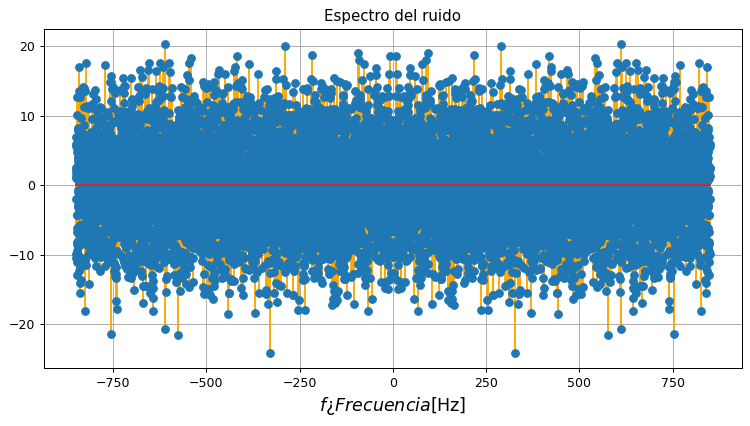

In [ ]:
Fs=1700
vffpr = np.fft.fftfreq(len(ruido),1/Fs) #calculo vector de frecuencias
fftsafpr= np.fft.fft(ruido) #cálculo FFT
plt.figure(figsize=(10,5), dpi=90)
plt.stem(vffpr,fftsafpr/2,'orange')
plt.title(r'Espectro del ruido')
plt.xlabel(r'$f¿Frecuencia$[Hz]',fontsize = 14)

#plt.xlim(-7,7)
plt.grid(True)
plt.show()

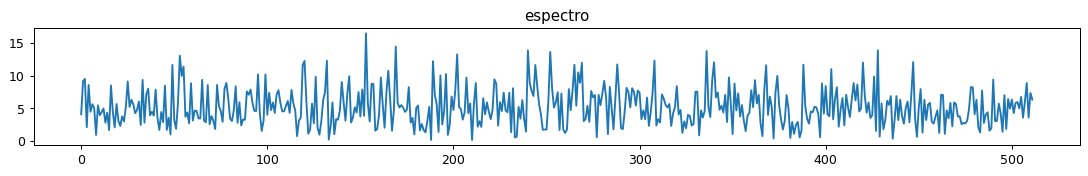

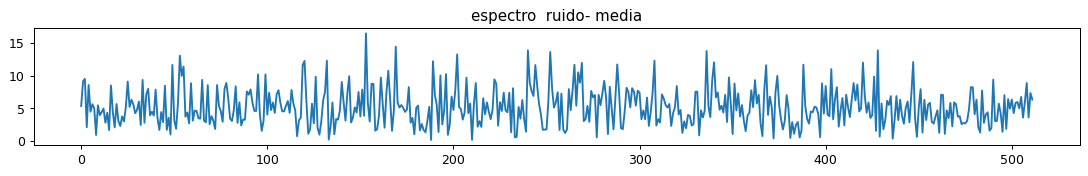

In [ ]:
num_fft = 1024;
Y1 = fft(ruido, num_fft)
Y1 = abs(Y1)
vffpro = np.fft.fftfreq(len(ruido),1/Fs) #calculo vector de frecuencias
fftsafpro= np.fft.fft(ruido) #cálculo FFT
plt.figure(figsize=(15,10), dpi=90)
ax=plt.subplot(512)
ax.set_title('espectro')
plt.plot(Y1[:num_fft//2])

media=np.mean(ruido)

var=np.var(ruido)

ruido1=ruido-media

num_fft = 1024;
Y2 = fft(ruido1, num_fft)
Y2= abs(Y2)
plt.figure(figsize=(15,10), dpi=90)
ax=plt.subplot(512)
ax.set_title('espectro  ruido- media')
plt.plot(Y2[:num_fft//2])

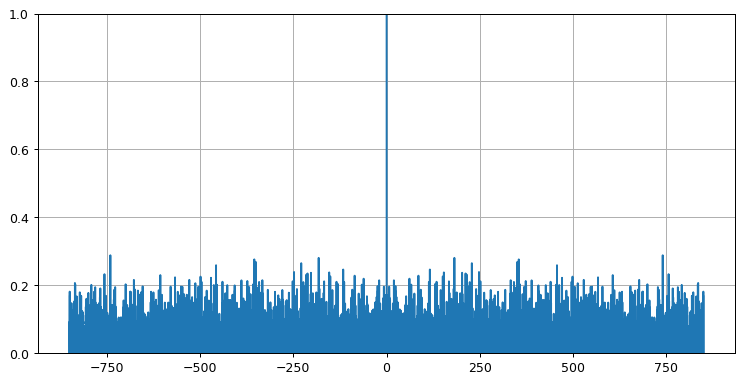

In [ ]:
coruip = np.fft.ifft(abs(fftsafpro))
plt.figure(figsize=(10,5), dpi=90)
plt.plot(vffpro,coruip)
#plt.xlim(-10,10)
plt.ylim(0,1)
plt.grid()

SLIT

In [ ]:
from sympy import Symbol
R1 = Symbol('R1')
R2 = Symbol('R2')
C1 = Symbol('C1')

I1 = Symbol('I1')


x = Symbol('x')

jw = Symbol('jw')
Y=I1*((R1*C1*jw+1)/C1*jw)
X=I1*((R1*C1*jw+R2*C1*jw+1)/C1*jw)
H=Y/X
print("funcion de transferencia:")
H

funcion de transferencia:


(C1*R1*jw + 1)/(C1*R1*jw + C1*R2*jw + 1)

In [ ]:
R1=1
R2=10000 #se mueve para ajustar el filtro

C1=1*10**-6  #afecta la  funcion de correlacion


num = [-C1*R1, -1] #Lo extraigo de num_coeffs
den = [-C1*R1 -C1*R2, -1]
num, den

([-1e-06, -1], [-0.010001, -1])

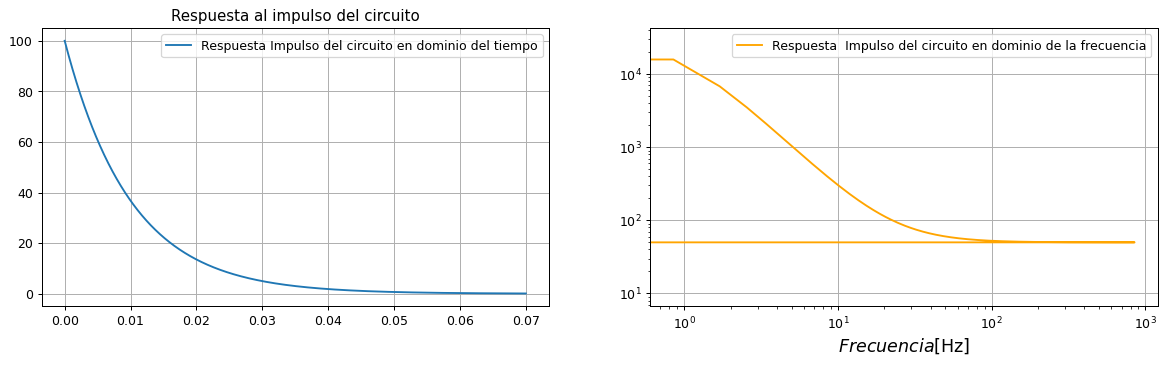

In [ ]:
lti_system = lti(num, den)   #LTI

t5, h = lti_system.impulse(N=2000) 

fig = plt.figure(figsize=(16, 9), dpi=90)
plt.subplot(221)
plt.title('Respuesta al impulso del circuito')
plt.plot(t5,h,label='Respuesta Impulso del circuito en dominio del tiempo')
plt.grid()
plt.legend()

Fs=1700
vffpr = np.fft.fftfreq(len(h),1/Fs) #calculo vector de frecuencias
fftsafpr= np.fft.fft(h) #cálculo FFT
plt.subplot(222)
plt.plot(vffpr,fftsafpr,  'orange',label='Respuesta  Impulso del circuito en dominio de la frecuencia')
plt.xlabel(r'$Frecuencia$[Hz]',fontsize = 14)

plt.semilogy(0,10)
plt.semilogx(0,10)
#plt.ylim(0,1)

plt.legend()
plt.grid(True)
plt.show()

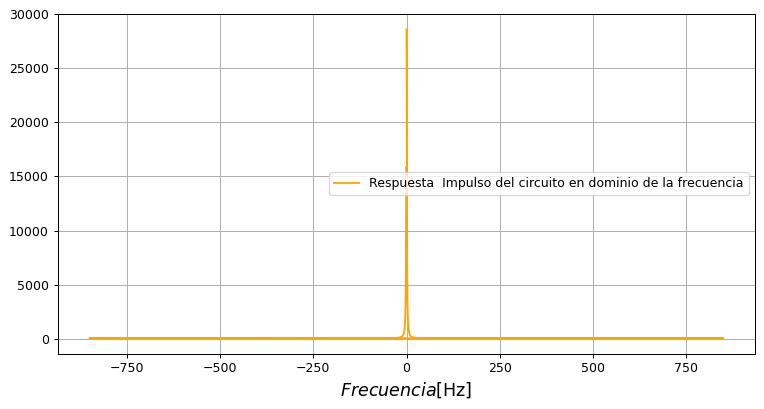

In [ ]:
fig = plt.figure(figsize=(10,5), dpi=90)
Fs=1700
vffpr = np.fft.fftfreq(len(h),1/Fs) #calculo vector de frecuencias
fftsafpr= np.fft.fft(h) #cálculo FFT
plt.plot(vffpr,fftsafpr,  'orange',label='Respuesta  Impulso del circuito en dominio de la frecuencia')
plt.xlabel(r'$Frecuencia$[Hz]',fontsize = 14)

#plt.ylim(0,10000)
plt.legend()
plt.grid(True)
plt.show()

Ruido por el sistema

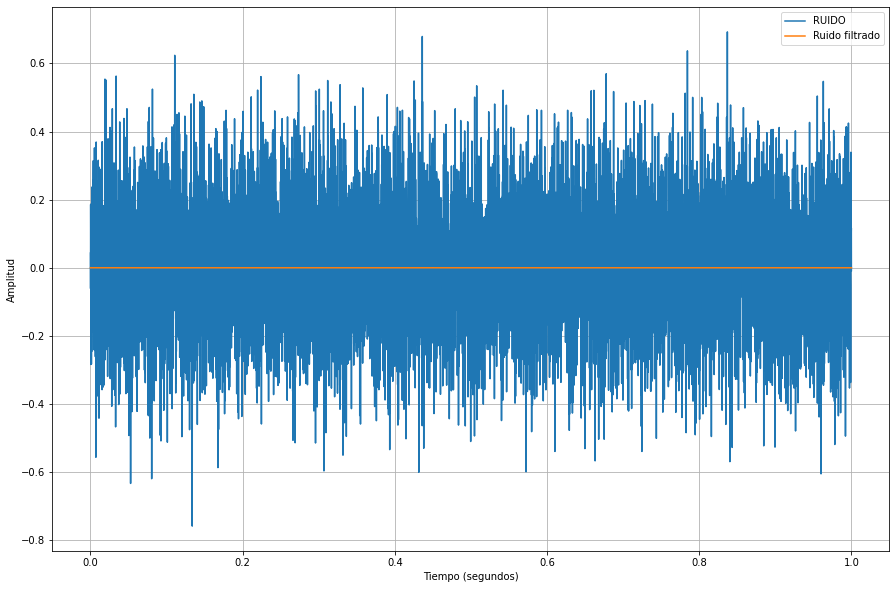

In [ ]:
_,rui,_= lti_system.output(ruido, t)

plt.figure(figsize=(15,10))
plt.plot(t, ruido,label="RUIDO")
plt.plot(t, rui,label="Ruido filtrado")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
#plt.xlim(0, 0.2)
plt.grid()

In [ ]:
from sympy import Symbol
Snw = Symbol('Sn(w)')
No = Symbol('No')
r = Symbol('2')

Hw = Symbol('H(w)')


Rnw = Symbol('Rn(w)')

T = Symbol('T^-1')

J=(No/r)* abs((Hw)) **2
G=T*abs(Snw)
print("espectro de potencia Sn(w):")
J

espectro de potencia Sn(w):


No*Abs(H(w))**2/2

Funcion de correlacion 

In [ ]:
print("Funcion de correlacion Rn(w):")
G

Funcion de correlacion Rn(w):


T^-1*Abs(Sn(w))

Espectro de potencia

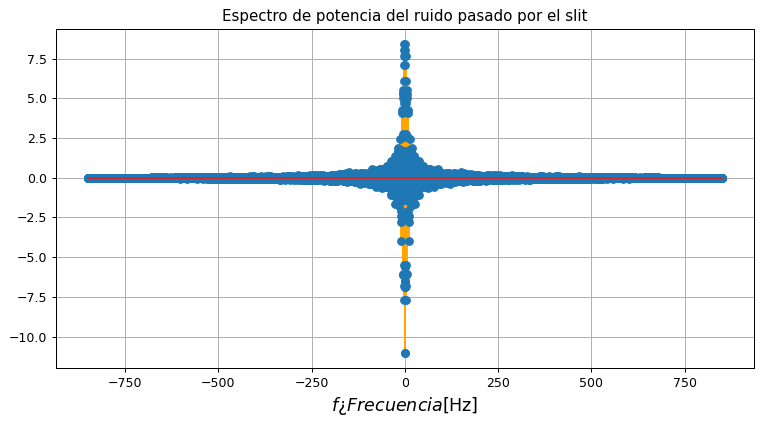

In [ ]:
Fs=1700
vffpr = np.fft.fftfreq(len(rui),1/Fs) #calculo vector de frecuencias
fftsafpr= np.fft.fft(rui) #cálculo FFT
plt.figure(figsize=(10,5), dpi=90)
plt.stem(vffpr,fftsafpr/2,'orange')
plt.title(r'Espectro de potencia del ruido pasado por el slit')
plt.xlabel(r'$f¿Frecuencia$[Hz]',fontsize = 14)

#plt.xlim(-7,7)
plt.grid(True)
plt.show()

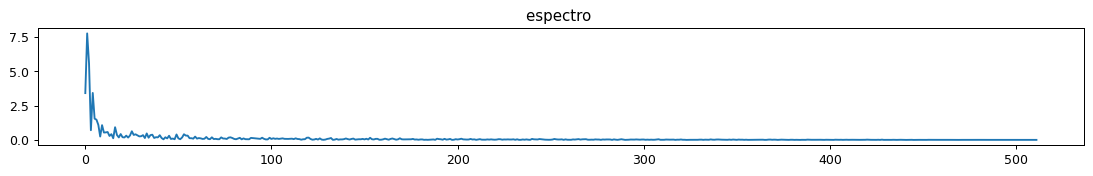

In [ ]:
from scipy.fftpack import fft, fftshift, ifft
from scipy.fftpack import fftfreq
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Puntos de muestreo
num_fft = 1024;
Y = fft(rui, num_fft)
Y = abs(Y)
plt.figure(figsize=(15,10), dpi=90)
ax=plt.subplot(512)
ax.set_title('espectro ')
plt.plot(Y[:num_fft//2])

Funcion de correlacion

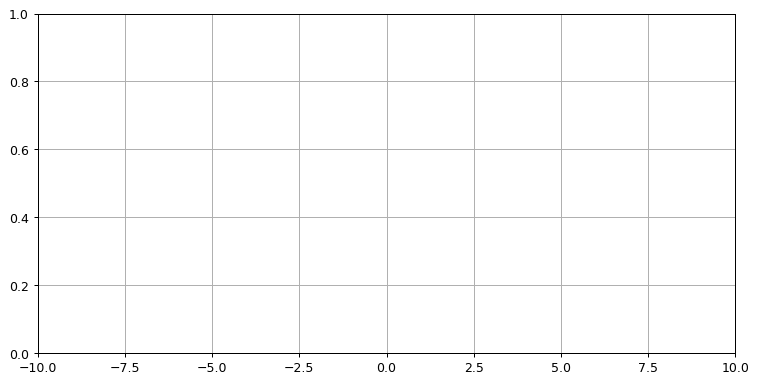

In [ ]:
corui = np.fft.ifft(abs(fftsafpr))
plt.figure(figsize=(10,5), dpi=90)
plt.plot(vffpr,corui)
plt.xlim(-10,10)
plt.ylim(0,1)

plt.grid(True)
plt.show()